#### 강남구 입지 Feature Extraction & Clustering 코드 1
##### 사용 데이터 : 유동인구비율, "문화·체육·휴양시설, 상업지역, 주거지역" 의 비율
##### 1. 일 평균 생활 인구 / 주거 인구 비율 -> 상업지구인지, 주거지역인지 알기 위함

In [1]:
import pandas as pd
## Load Data
# 주거 인구 데이터 Load
live_people = pd.read_excel("../resources/rawdata/201902_인구 및 세대현황(전체).xlsx")
# 불필요한 컬럼 삭제
live_people = live_people.iloc[:,:6]

# 활동 인구수 데이터 Load
active_people = pd.read_excel("../resources/extractedData/강남구 행정동별 활동인구 평균.xlsx")

# 토지 피복 비율 데이터 Load
landscape = pd.read_csv("../resources/extractedData/Medium classification of land cover (divided into 3 categories).csv", encoding="utf8")

In [2]:
# 데이터 확인 - 행정동 데이터 에러 해결
live_people["행정동"] = live_people["행정동"].str.replace(" ","")

In [3]:
live_people

,행정동,계,남,여,지역,남자비율
0,신사동,17541,8158,9383,3.234312,1.504220
1,논현1동,23452,10849,12603,4.324217,2.000402
2,논현2동,21960,10289,11671,4.049113,1.897146
3,압구정동,27953,12878,15075,5.154137,2.374521
4,청담동,30014,14128,15886,5.534157,2.605003
5,삼성1동,14811,7389,7422,2.730939,1.362427
6,삼성2동,30291,14411,15880,5.585231,2.657184
7,대치1동,25413,12737,12676,4.685797,2.348522
8,대치2동,39537,20066,19471,7.290063,3.699886
9,대치4동,20773,9806,10967,3.830247,1.808088


In [4]:
active_people

,행정동,주중평균활동인구,주말평균활동인구,일평균활동인구
0,신사동,38938.86,34017.55,37480.70
1,논현1동,45948.54,38033.38,43603.31
2,논현2동,47635.09,35376.66,44002.96
3,삼성1동,48142.06,36636.06,44732.87
4,삼성2동,42054.86,31835.21,39026.81
5,대치1동,26184.46,25688.00,26037.36
6,대치4동,34691.24,31401.05,33716.37
7,역삼1동,119213.17,82748.01,108408.68
8,역삼2동,53135.33,42006.91,49838.02
9,도곡1동,28094.82,24927.20,27156.26


In [5]:
landscape

,행정동,주거지역,문화·체육·휴양시설,상업지역
0,개포1동,0.540370,0.034857,0.424773
1,개포2동,0.646407,0.174853,0.178740
2,개포4동,0.521683,0.037082,0.441235
3,논현1동,0.496207,0.014120,0.489673
4,논현2동,0.411990,0.012579,0.575432
5,대치1동,0.604261,0.129195,0.266545
6,대치2동,0.438784,0.052936,0.508280
7,대치4동,0.485514,0.002936,0.511551
8,도곡1동,0.502608,0.023388,0.474004
9,도곡2동,0.434808,0.058701,0.506491


In [6]:
## 1. 일 평균 생활 인구 / 주거 인구 비율 -> 상업지구인지, 주거지역인지 알기 위함
geofeature = pd.DataFrame(columns=["행정동","유동인구비율","문화·체육·휴양시설","상업지역","주거지역"])

# 행정동별 주중, 주말 평균 생활 인구수
for name in list(landscape["행정동"]):
    lp = live_people[live_people["행정동"] == name]["계"].values[0]
    ap= active_people[active_people["행정동"] == name]["일평균활동인구"].values[0]
    ls1 = landscape[landscape["행정동"] == name]["문화·체육·휴양시설"].values[0]
    ls2 = landscape[landscape["행정동"] == name]["상업지역"].values[0]
    ls3 = landscape[landscape["행정동"] == name]["주거지역"].values[0]
    
    ratio = round(ap/lp, 2)
    geofeature = geofeature.append({"행정동":name, "유동인구비율":ratio,"문화·체육·휴양시설": ls1, 
                                     "상업지역":ls2,"주거지역": ls3},ignore_index=True)

# 유동인구 min-max normalization
# geofeature["유동인구비율(0-1)"] = (geofeature["유동인구비율"] - min(geofeature["유동인구비율"])) / (max(geofeature["유동인구비율"]) - min(geofeature["유동인구비율"]))

In [7]:
geofeature

,행정동,유동인구비율,문화·체육·휴양시설,상업지역,주거지역
0,개포1동,0.87,0.034857,0.424773,0.540370
1,개포2동,1.07,0.174853,0.178740,0.646407
2,개포4동,0.90,0.037082,0.441235,0.521683
3,논현1동,1.86,0.014120,0.489673,0.496207
4,논현2동,2.00,0.012579,0.575432,0.411990
5,대치1동,1.02,0.129195,0.266545,0.604261
6,대치2동,1.40,0.052936,0.508280,0.438784
7,대치4동,1.62,0.002936,0.511551,0.485514
8,도곡1동,1.20,0.023388,0.474004,0.502608
9,도곡2동,0.84,0.058701,0.506491,0.434808


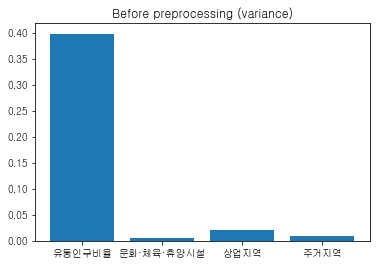

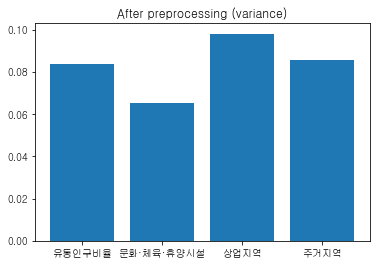

In [8]:
# 분산량 확인
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

x = geofeature.columns[1:]
y = [geofeature["유동인구비율"].var(), geofeature["문화·체육·휴양시설"].var(),geofeature["상업지역"].var(),geofeature["주거지역"].var()]
plt.bar(x,y)
plt.title("Before preprocessing (variance)")
plt.show()

# preprocessing 후 분산 확인
#from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리 

y = geofeature.iloc[:,1:].values

#y = StandardScaler().fit_transform(y) # x객체에 x를 표준화한 데이터를 저장
y = MinMaxScaler().fit_transform(y) # x객체에 x를 표준화한 데이터를 저장
y_t_df = pd.DataFrame(y, columns=["유동인구비율","문화·체육·휴양시설","상업지역","주거지역"])
y_t = [y_t_df["유동인구비율"].var(), y_t_df["문화·체육·휴양시설"].var(),y_t_df["상업지역"].var(),y_t_df["주거지역"].var()]
plt.bar(x, y_t)
plt.title("After preprocessing (variance)")
plt.show()

In [9]:
# 기존 4 Feature 
x_t_df = pd.concat([geofeature["행정동"],y_t_df], axis=1)
x_t_df

,행정동,유동인구비율,문화·체육·휴양시설,상업지역,주거지역
0,개포1동,0.013761,0.121210,0.528778,0.623225
1,개포2동,0.105505,0.652806,0.000000,0.939246
2,개포4동,0.027523,0.129660,0.564159,0.567532
3,논현1동,0.467890,0.042469,0.668261,0.491607
4,논현2동,0.532110,0.036616,0.852576,0.240613
5,대치1동,0.082569,0.479431,0.188711,0.813638
6,대치2동,0.256881,0.189862,0.708253,0.320466
7,대치4동,0.357798,0.000000,0.715282,0.459736
8,도곡1동,0.165138,0.077664,0.634585,0.510681
9,도곡2동,0.000000,0.211753,0.704408,0.308617


In [13]:
# PCA 진행 - 기존 Feature 4 -> 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
printcipalComponents = pca.fit_transform(y)
printcipalComponents
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

principalDf = pd.concat([geofeature["행정동"],principalDf], axis=1)
principalDf

,행정동,principal component1,principal component2
0,개포1동,-0.156722,-0.286012
1,개포2동,-0.801009,0.203360
2,개포4동,-0.102760,-0.267858
3,논현1동,0.236877,-0.056473
4,논현2동,0.512675,-0.009942
5,대치1동,-0.565927,0.049151
6,대치2동,0.198178,-0.060933
7,대치4동,0.247179,-0.160877
8,도곡1동,0.053090,-0.221092
9,도곡2동,0.074984,-0.206102


In [14]:
# 뽑힌 Feature로 clustering 진행 -  2 feature, 3 cluster 
from sklearn.cluster import KMeans

k = 3
data2 = principalDf.iloc[:,1:]

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(data2)

# 결과 저장
principalDf["cluster v1"] = model.fit_predict(data2)


In [10]:
# 뽑힌 Feature로 clustering 진행 -  4 feature, 3 cluster
from sklearn.cluster import KMeans

k = 3
data = x_t_df.iloc[:,1:]

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(data)

# 결과 저장
x_t_df["cluster v1"] = model.fit_predict(data)

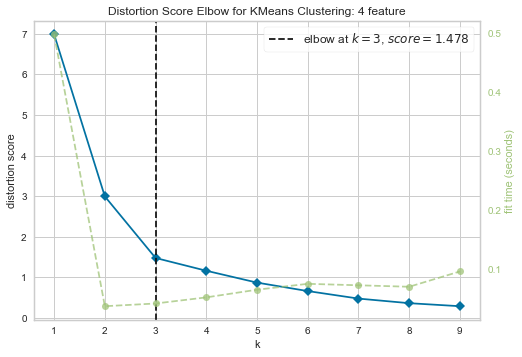

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: 4 feature'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer
# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: 4 feature")
visualizer.fit(data)
visualizer.show()

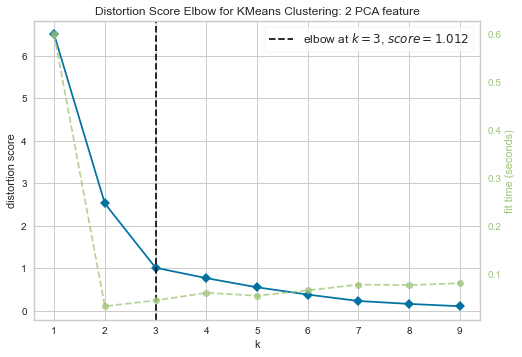

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: 2 PCA feature'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer
# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: 2 PCA feature")
visualizer.fit(data2)
visualizer.show()

In [16]:
# pca로 feature2개 만들고 cluster k3 으로 돌린 결과
from collections import Counter
print(Counter(principalDf["cluster v1"]))


print(principalDf[principalDf["cluster v1"] == 0]["행정동"].values)
print(principalDf[principalDf["cluster v1"] == 1]["행정동"].values)
print(principalDf[principalDf["cluster v1"] == 2]["행정동"].values)
principalDf

Counter({0: 10, 1: 7, 2: 5})
['개포1동' '개포4동' '논현1동' '대치2동' '대치4동' '도곡1동' '도곡2동' '삼성2동' '역삼2동' '청담동']
['개포2동' '대치1동' '세곡동' '수서동' '일원1동' '일원2동' '일원본동']
['논현2동' '삼성1동' '신사동' '압구정동' '역삼1동']


,행정동,principal component1,principal component2,cluster v1
0,개포1동,-0.156722,-0.286012,0
1,개포2동,-0.801009,0.203360,1
2,개포4동,-0.102760,-0.267858,0
3,논현1동,0.236877,-0.056473,0
4,논현2동,0.512675,-0.009942,2
5,대치1동,-0.565927,0.049151,1
6,대치2동,0.198178,-0.060933,0
7,대치4동,0.247179,-0.160877,0
8,도곡1동,0.053090,-0.221092,0
9,도곡2동,0.074984,-0.206102,0


In [12]:
# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(x_t_df["cluster v1"]))


print(x_t_df[x_t_df["cluster v1"] == 0]["행정동"].values)
print(x_t_df[x_t_df["cluster v1"] == 1]["행정동"].values)
print(x_t_df[x_t_df["cluster v1"] == 2]["행정동"].values)
x_t_df


Counter({0: 10, 1: 7, 2: 5})
['개포1동' '개포4동' '논현1동' '대치2동' '대치4동' '도곡1동' '도곡2동' '삼성2동' '역삼2동' '청담동']
['개포2동' '대치1동' '세곡동' '수서동' '일원1동' '일원2동' '일원본동']
['논현2동' '삼성1동' '신사동' '압구정동' '역삼1동']


,행정동,유동인구비율,문화·체육·휴양시설,상업지역,주거지역,cluster v1
0,개포1동,0.013761,0.121210,0.528778,0.623225,0
1,개포2동,0.105505,0.652806,0.000000,0.939246,1
2,개포4동,0.027523,0.129660,0.564159,0.567532,0
3,논현1동,0.467890,0.042469,0.668261,0.491607,0
4,논현2동,0.532110,0.036616,0.852576,0.240613,2
5,대치1동,0.082569,0.479431,0.188711,0.813638,1
6,대치2동,0.256881,0.189862,0.708253,0.320466,0
7,대치4동,0.357798,0.000000,0.715282,0.459736,0
8,도곡1동,0.165138,0.077664,0.634585,0.510681,0
9,도곡2동,0.000000,0.211753,0.704408,0.308617,0


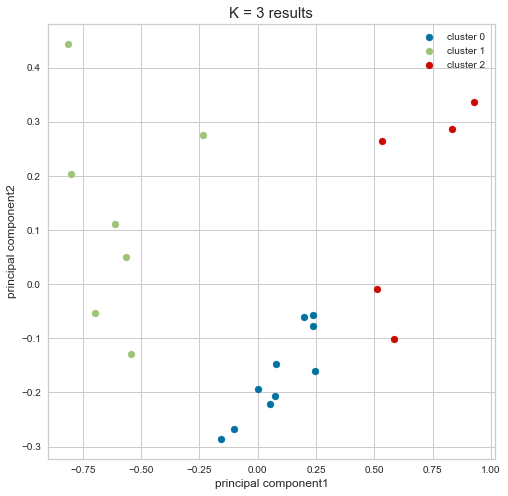

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(principalDf.loc[principalDf['cluster v1'] == i, 'principal component1'], principalDf.loc[principalDf['cluster v1'] == i, 'principal component2'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('principal component1', size = 12)
plt.ylabel('principal component2', size = 12)
plt.show()